# Football Lob Pass prediction model

### Goalkicks or lob passes are crucial to start a counter attack

### Analyzing the opposition's areial abilities will help in taking adavntage of weak spots and creating chances

Using tensorflow-Keras for model training and prediction <br>
Using matplotlib for plotting graphs

In [2]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

Creating a dataset for a football field <br>
1. Red  - Opposite team attacks the ball <br>
2. Blue - Preferred team attacks the ball


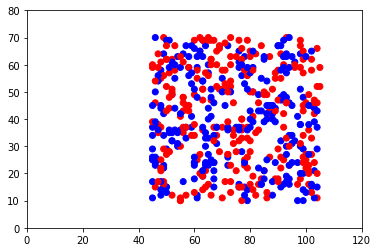

In [85]:
coordinates = []
result=[]

for i in range(0,500):
    single_coordinate=[random.randint(45, 105),random.randint(10, 70)]
    coordinates.append(single_coordinate)
    result.append(random.randint(0, 1))
        
x = np.array(coordinates)
y = np.array(result)

training_coordinates , testing_coordinates =  x[:450], x[450:]
training_result , testing_result =  y[:450], y[450:]

assert(training_coordinates.shape[0] == training_result.shape[0])

# RED = oppposite team heads the ball, GREEN = same team heads the ball
# Where should the goalkeeper kick?
plt.xlim(0, 120)
plt.ylim(0, 80)

colors = np.array(['red','blue'])
a,b = x.T
plt.scatter(a,b,c=colors[y])
plt.show()



Feature Scaling

In [105]:
#took LCM (80,120) for now
#Looking for a better approach to reduce the error in gradient descent
x=x/240

#### Model 1

uses ReLu as the activation function for the inner/hidden layers neural network <br>
uses Sigmoid as the activation function for the final/output layer.

##### Shortcomings
1. 50% accuracy, would need to divide the datasert in a better way
2. Incomplete prediction, will have to inspect whythe prediction is "nan"

In [87]:
#create a model for this data set
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu,input_shape = (2,)), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_coordinates, training_result, epochs=50)
model.summary()

Train on 450 samples
Epoch 1/50
450/450 [==============================] - 0s 719us/sample - loss: nan - accuracy: 0.5000
Epoch 2/50
450/450 [==============================] - 0s 103us/sample - loss: nan - accuracy: 0.5000
Epoch 3/50
450/450 [==============================] - 0s 101us/sample - loss: nan - accuracy: 0.5000
Epoch 4/50
450/450 [==============================] - 0s 120us/sample - loss: nan - accuracy: 0.5000
Epoch 5/50
450/450 [==============================] - 0s 120us/sample - loss: nan - accuracy: 0.5000
Epoch 6/50
450/450 [==============================] - 0s 101us/sample - loss: nan - accuracy: 0.5000
Epoch 7/50
450/450 [==============================] - 0s 105us/sample - loss: nan - accuracy: 0.5000
Epoch 8/50
450/450 [==============================] - 0s 101us/sample - loss: nan - accuracy: 0.5000
Epoch 9/50
450/450 [==============================] - 0s 94us/sample - loss: nan - accuracy: 0.5000
Epoch 10/50
450/450 [==============================] - 0s 99us/sample -

In [88]:
model.evaluate(testing_coordinates,testing_result)


50/50 [==============================] - 0s 2ms/sample - loss: nan - accuracy: 0.5200


[nan, 0.52]

In [89]:
prediction_coordinate=[random.randint(45, 105),random.randint(10, 70)]
predictor = np.array(prediction_coordinate)

model.predict(np.array([prediction_coordinate]))

array([[nan]], dtype=float32)